![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [4]:
# Import necessary packages
import pandas as pd
import numpy as np

# Import CSV for prices
airbnb_price = pd.read_csv('data/airbnb_price.csv')

# Import Excel file for room types
airbnb_room_type = pd.read_excel('data/airbnb_room_type.xlsx')

# Import TSV for review dates
airbnb_last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')

# Join the three data frames together into one
listings = pd.merge(airbnb_price, airbnb_room_type, on='listing_id')
listings = pd.merge(listings, airbnb_last_review, on='listing_id')

# What are the dates of the earliest and most recent reviews?
# To use a function like max()/min() on last_review date column, it needs to be converted to datetime type
listings['last_review_date'] = pd.to_datetime(listings['last_review'], format='%B %d %Y')
first_reviewed = listings['last_review_date'].min()
last_reviewed = listings['last_review_date'].max()

# How many of the listings are private rooms?
# Since there are differences in capitalization, make capitalization consistent
listings['room_type'] = listings['room_type'].str.lower()
private_room_count = listings[listings['room_type'] == 'private room'].shape[0]

# What is the average listing price?
# To convert price to numeric, remove " dollars" from each value
listings['price_clean'] = listings['price'].str.replace(' dollars', '').astype(float)
avg_price = listings['price_clean'].mean()

review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room_count],
    'avg_price': [round(avg_price, 2)]
})

print(review_dates)


  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme(style="whitegrid")


Visualize the Distribution of Room Types

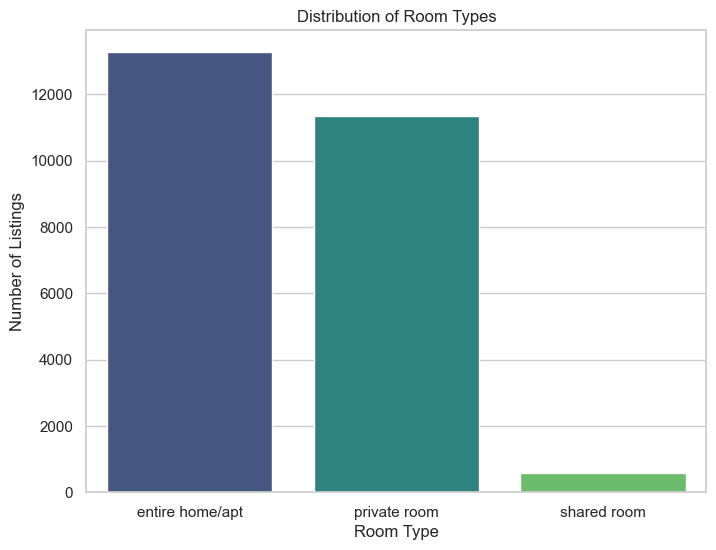

In [6]:
# Count the number of listings by room type
room_type_counts = listings['room_type'].value_counts()

# Plot the distribution of room types
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()


Visualize Price Distribution Across Neighborhoods

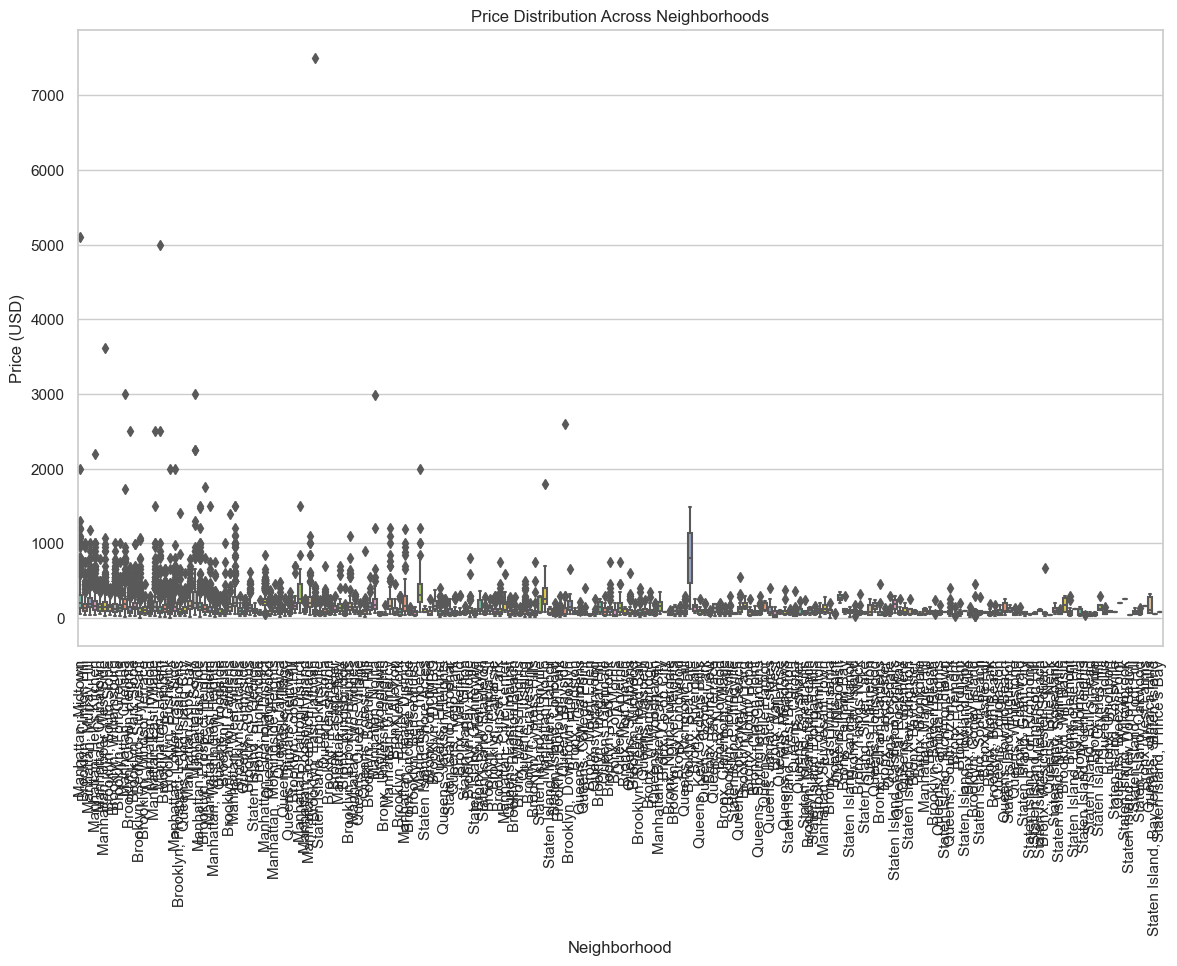

In [7]:
# Boxplot to show price distribution by neighborhood
plt.figure(figsize=(14, 8))
sns.boxplot(x='nbhood_full', y='price_clean', data=listings, palette='Set2')
plt.xticks(rotation=90)
plt.title('Price Distribution Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.show()


Visualize the Timeline of Reviews

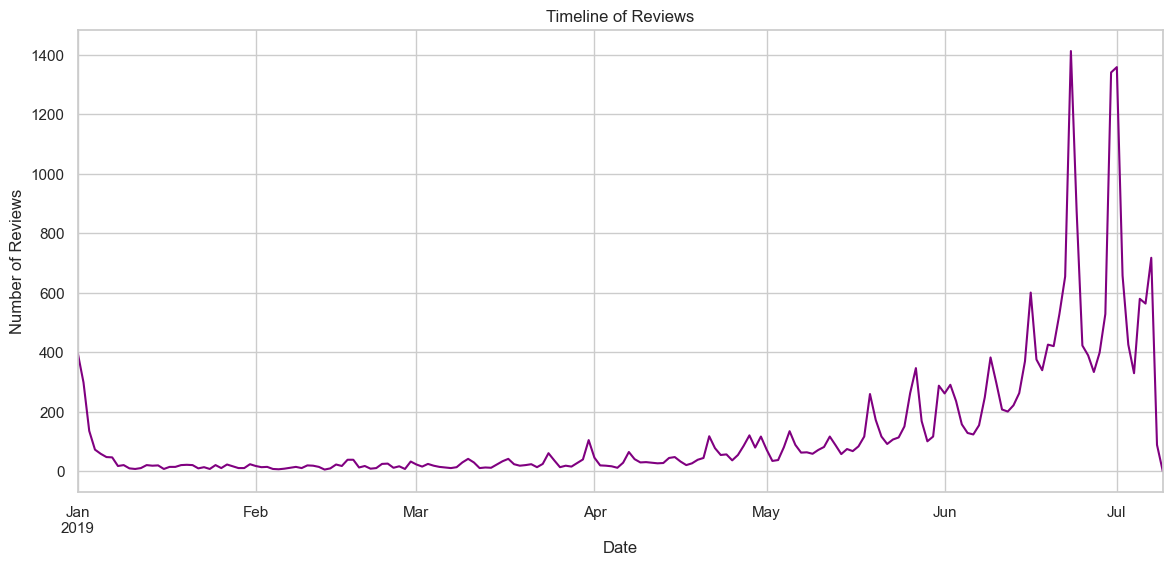

In [8]:
# Count the number of reviews by date
review_timeline = listings['last_review_date'].value_counts().sort_index()

# Plot the review timeline
plt.figure(figsize=(14, 6))
review_timeline.plot(kind='line', color='purple')
plt.title('Timeline of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


Price Distribution by Room Type

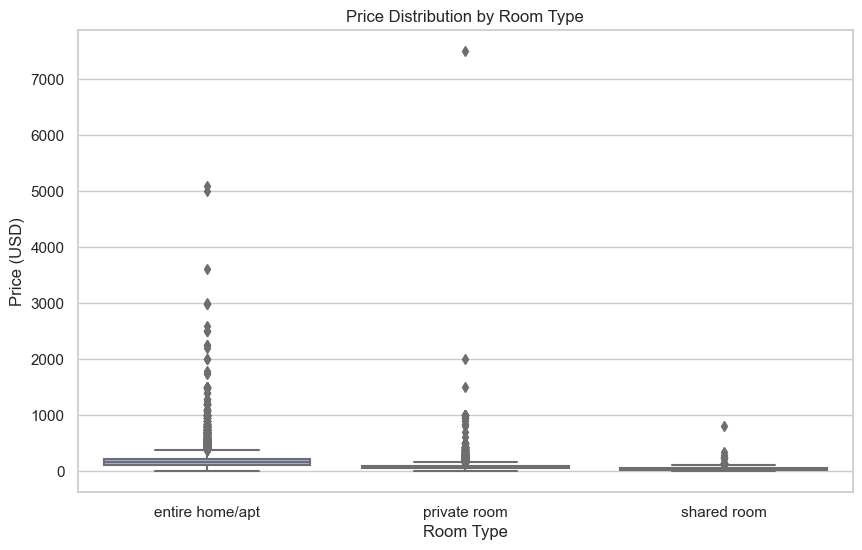

In [9]:
# Boxplot to show price distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price_clean', data=listings, palette='coolwarm')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.show()
